# **Library Imports**

In [2]:
# Import pandas library for data manipulation and analysis
import pandas as pd

# Import NumPy library for numerical operations
import numpy as np

# Import Seaborn library for statistical data visualization
import seaborn as sns

# Import matplotlib.pyplot for creating static, animated, and interactive visualizations
import matplotlib.pyplot as mtp


# **Data Understanding**

Load the dataset from a CSV file into a pandas DataFrame and Display the first few rows of the DataFrame to get an idea of the data structure



In [5]:
dataset = pd.read_csv('/content/london_weather.csv')
dataset

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,20201230,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


Display the shape of the DataFrame to understand its dimensionality (number of rows and columns)


In [6]:
dataset.shape

(15341, 10)

Display a concise summary of the DataFrame, including the number of non-null entries in each column and the data type of each column


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


# **Data Preparation and Cleaning**

Calculate the sum of missing values for each column in the dataset


In [8]:
dataset.isnull().sum()

date                   0
cloud_cover           19
sunshine               0
global_radiation      19
max_temp               6
mean_temp             36
min_temp               2
precipitation          6
pressure               4
snow_depth          1441
dtype: int64

Remove rows with any missing values from the dataset


In [9]:
dataset = dataset.dropna(axis=0)
dataset

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
14970,20191227,8.0,0.0,12.0,9.6,7.5,6.6,0.0,102880.0,0.0
14971,20191228,8.0,0.0,12.0,9.9,8.1,6.6,0.0,103630.0,0.0
14972,20191229,6.0,2.2,29.0,11.5,8.7,7.4,0.0,103360.0,0.0
14973,20191230,0.0,3.6,37.0,9.3,6.5,1.5,0.0,102970.0,0.0


Drop the 'date' column from the DataFrame, as it might not be needed for certain analyses


In [10]:
# Drop the date column
dataset = dataset.drop(['date'], axis=1)
dataset.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


# **Feature Selection**

This section starts by calculating the correlation coefficients between pairs of variables in the dataset to identify potential relationships. Then, it visualizes this correlation matrix using a heatmap, which helps in understanding the strength and direction of the linear relationships between variables. Specifically, it annotates the heatmap to make reading the correlation values easier. Following this, the code prepares data for linear regression or another analysis by extracting and reshaping the 'sunshine' column into a 2D array for the independent variable (x) and the 'global_radiation' column as the dependent variable (y). This setup is crucial for modeling the relationship between sunshine hours and global radiation levels.


In [11]:
dataset.corr()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
cloud_cover,1.000000,-0.734598,-0.466202,-0.184016,-0.084180,0.071692,0.229224,-0.237053,-0.001365
sunshine,-0.734598,1.000000,0.851249,0.468120,0.397064,0.222065,-0.226453,0.219350,-0.033778
global_radiation,-0.466202,0.851249,1.000000,0.687035,0.635150,0.479892,-0.157646,0.144784,-0.061488
max_temp,-0.184016,0.468120,0.687035,1.000000,0.907365,0.806246,-0.067437,0.099683,-0.130107
mean_temp,-0.084180,0.397064,0.635150,0.907365,1.000000,0.955716,-0.007041,0.004609,-0.154469
min_temp,0.071692,0.222065,0.479892,0.806246,0.955716,1.000000,0.037195,-0.070920,-0.157537
precipitation,0.229224,-0.226453,-0.157646,-0.067437,-0.007041,0.037195,1.000000,-0.347647,-0.002357
pressure,-0.237053,0.219350,0.144784,0.099683,0.004609,-0.070920,-0.347647,1.000000,-0.020581
snow_depth,-0.001365,-0.033778,-0.061488,-0.130107,-0.154469,-0.157537,-0.002357,-0.020581,1.000000


**Correlation Matrix**

<Axes: >

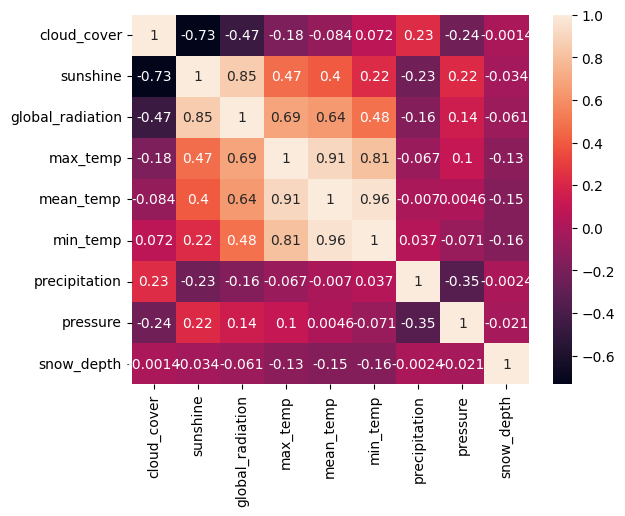

In [12]:
# Plot the correlation matrix
sns.heatmap(dataset.corr(), annot=True)

In [13]:
x = dataset["sunshine"].values.reshape(-1,1)
y = dataset["global_radiation"].values

# **Normalization and Modelling**

Import necessary libraries for data splitting, scaling, and modeling. First, the dataset is divided into training and testing sets to allow for a fair assessment of the model's performance. The split allocates one-third of the data for testing and the rest for training, with a set random state for reproducible results. Following the split, a StandardScaler is applied to both the training and testing sets for the independent variable 'x' to standardize features by removing the mean and scaling to unit variance, crucial for many machine learning algorithms to perform well. Finally, a LinearRegression model is initialized and fitted with the scaled training data, capturing the relationship between the independent variable 'sunshine' and the dependent variable 'global_radiation'. Predictions are then made on both the training and testing sets to evaluate the model's performance and to understand how well the model generalizes to unseen data.


In [14]:
from sklearn.model_selection import train_test_split

# Split Data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=1/3,random_state=0)

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [17]:
y_pred = model.predict(x_test)
x_pred = model.predict(x_train)

# **Evaluation**

In [18]:
print("Train: ", model.score(x_train,y_train))
print("Test: ", model.score(x_test,y_test))

Train:  0.7235262666420734
Test:  0.7267531240735394


# **Visualization**

Text(0, 0.5, 'global_radiation')

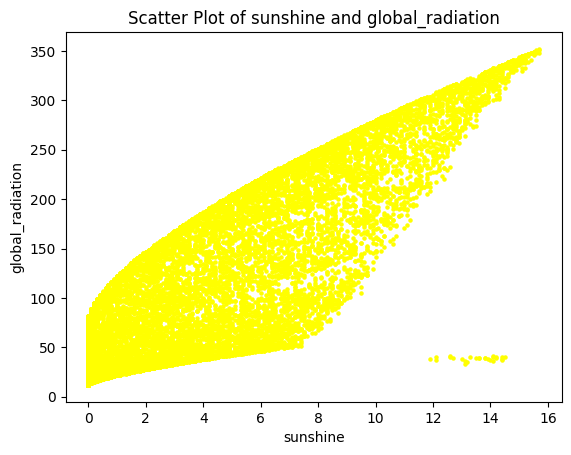

In [19]:
from pandas._libs.tslibs.period import IncompatibleFrequency
sunshine = dataset["sunshine"]
global_radiation = dataset["global_radiation"]

mtp.title("Scatter Plot of sunshine and global_radiation")
mtp.scatter(sunshine,global_radiation, color="yellow", s=5)
mtp.xlabel("sunshine")
mtp.ylabel("global_radiation")

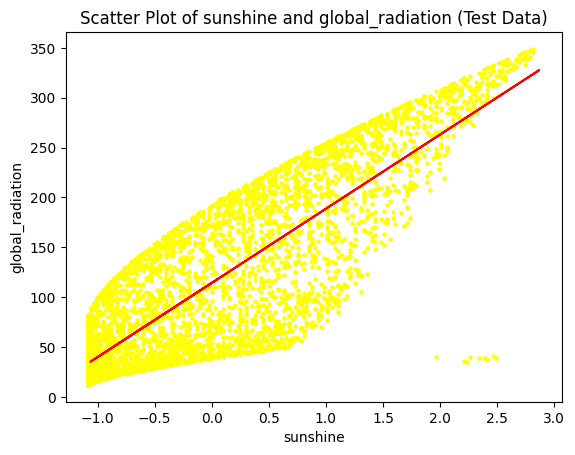

In [20]:
mtp.ticklabel_format(style="plain")
mtp.scatter(x_test,y_test,color="yellow", s=5)
mtp.plot(x_train,x_pred,color="red")
mtp.title("Scatter Plot of sunshine and global_radiation (Test Data)")
mtp.xlabel("sunshine")
mtp.ylabel("global_radiation")
mtp.show()